# Linear regression with one variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['population', 'profits'])
data.head()

,population,profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


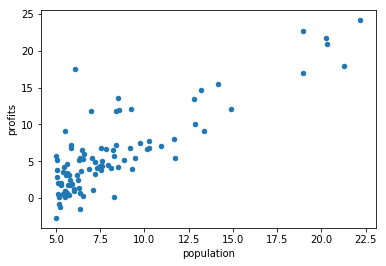

In [3]:
data.plot(kind='scatter', x='population', y='profits')
plt.show()

In [26]:
# LINEAR REGRESSION COST FUNCTION
def CostFunction(X, Y, theta):
    Sum = np.power((X*theta.T-Y), 2)
    return np.sum(Sum)/(2*len(X))


# VECTORIZATION
data.insert(0, 'Ones', 1)

In [27]:
# GET HOW MANY COLUMNS IN THIS DF
cols = data.shape[1]
# X EQUAL TO 1,2 COLUMNS AND Y EQUAL TO THE LAST COLUM
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]
# BUT NOW X,Y ARE DF NOT MATRIX,TRANSFORM THEM
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0]))
X.shape, Y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [28]:
CostFunction(X, Y, theta)

32.072733877455676

In [39]:
# GRADIENT DECENT
def GradientDecent(X, Y, theta, learningrate, iteration):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])  # ravel 扁平化函数
    cost = np.zeros(iteration)
    for i in range(iteration):
        error = X*theta.T-Y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - learningrate/len(X) * np.sum(term)
        theta = temp
        cost[i] = CostFunction(X, Y, theta)
    return theta, cost

In [40]:
# SOME HYPER PARAMETERS
iteration = 1500
learningrate = 0.01

g, cost = GradientDecent(X, Y, theta, learningrate, iteration)
g

matrix([[-3.63029144,  1.16636235]])

In [36]:
cost

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

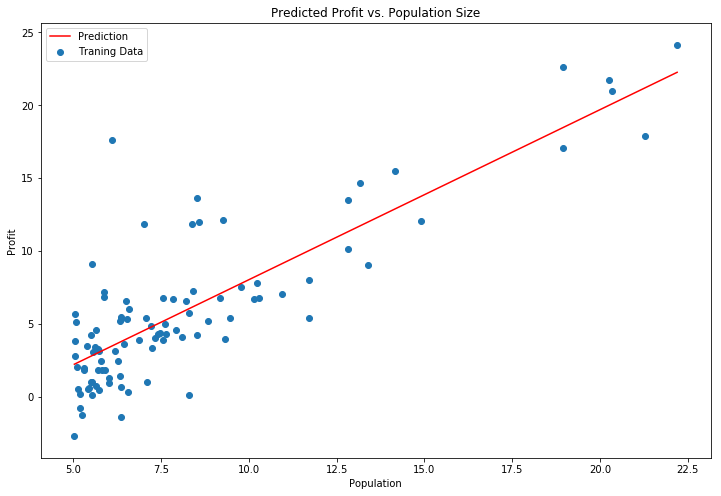

In [45]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0]+(g[0, 1]*x)


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profits, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

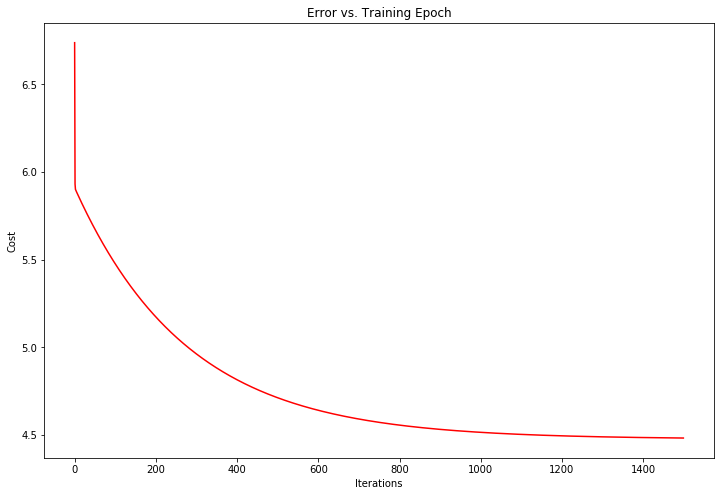

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iteration), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# Linear regression with multiple variables

In [77]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['size', 'bedrooms', 'price'])
# NORMALIZATION
data2 = (data2-data2.mean())/data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [78]:
data2.insert(0, 'ones', 1)
col = data2.shape[1]
X2 = data2.iloc[:, :col-1]
Y2 = data2.iloc[:, col-1:]
X2 = np.matrix(X2.values)
Y2 = np.matrix(Y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))
iteration2 = 1500
learningrate2 = 0.01
X2.shape, Y2.shape, theta2.shape

((47, 3), (47, 1), (1, 3))

In [79]:
g2, cost2 = GradientDecent(X2, Y2, theta2, learningrate2, iteration2)
g2

matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])

In [80]:
cost2

array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068671, 0.13068671,
       0.13068671])

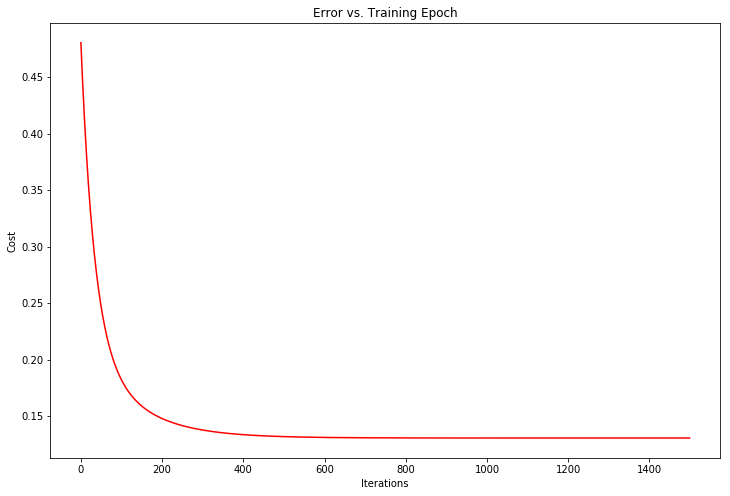

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iteration), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()